In [95]:
!ls

datalab  nltk_data  train_sentiment_utf8.csv


# Introducción 

La idea de la práctica es visitar aquellos temas que en cierta manera nos permitan ver más contenido del curso.

La práctica esta dividida en 4 o 5 subapartados, que ya tenéis en este mismo Notebook. Estos subapartados estan aquí para que rellenéis el código que hace falta para la realización de la práctica. Obviamente podéis usar tantas celdas como os hagan falta, es más es de agradecer si el código final esta algo "limpio". Usar funciones, algo de comentario, etc, etc...

Usaremos 2 datasets, uno para el primer ejercicio, y otro para el resto de ejercicios.

Ejercicios:


1.   Machine Learning vs Deep Learning (Acordaros que hay que implementar el pipeline visto en clase entero)

    1.1. Implementación de un modelo de Sentiment Analysis con algún algoritmo de Machine Learning Clásico.
    
    1.2. Implementación de un modelo de Sentiment Analysis con alguna arquitectura de Deep Learning.
    
    1.3. Breve Comparación de resultados. Confusion Matrix.
    
2. Hacer Analysis de los tweets del segundo dataset. Que temas aparecen? Como se representan estos temas? De que hablan unos y otros?

3. Escoged a uno de los dos presidentes, y escribid tweets como ellos, usando un Modelo Generativo.

En cada ejercicio, espero explicaciones y razonamientos del porque una arquitectura y no otra, por ejemplo en Deep Learning, porque usar Convolutionals en lugar de recurrentes, o en Machine Learning, Bayes en lugar de SVM. Hay que explicar el pipeline, sobretodo el preproceso de datos, con lo que habrá que hacer un pequeño estudio de que datos tenemos, y si hay cosas que se pueden ignorar, si hacéis stemming, o no, etc, etc...

Acordaros de que objetivo final no es que obtengáis una accuracy brutal, es que comprendais que pasa cuando usais un algoritmo u otro, y que problemas o beneficios nos dan.

![](https://i.pinimg.com/736x/19/63/8c/19638c0b33e2f7822d6806ce31d89d84--funny-cartoons-funny-jokes.jpg =400x)

Mucha suerte y ánimo!



#Instalamos librerías

In [4]:
!pip install spacy

    100% |████████████████████████████████| 22.0MB 1.8MB/s 
    100% |████████████████████████████████| 122kB 18.2MB/s 
    100% |████████████████████████████████| 1.2MB 13.6MB/s 
    100% |████████████████████████████████| 194kB 17.8MB/s 
    100% |████████████████████████████████| 153kB 22.9MB/s 
    100% |████████████████████████████████| 604kB 8.9MB/s 
    100% |████████████████████████████████| 317kB 18.7MB/s 
    100% |████████████████████████████████| 450kB 20.1MB/s 
    100% |████████████████████████████████| 51kB 9.1MB/s 
  Running setup.py bdist_wheel for spacy ... - \ | / - \ | / -

 \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done
  Stored in directory: /content/.cache/pip/wheels/60/0b/bb/7c2e28db574dbb2358176934eddd32a1c5f838ba0bc23eaaab
  Running setup.py bdist_wheel for murmurhash ... - \ | / done
  Stored in directory: /content/.cache/pip/wheels/b8/94/a4/f69f8664cdc1098603df44771b7fec5fd1b3d8364cdd83f512
  Running setup.py bdist_wheel for cymem ... - \ done
  Stored in directory: /content/.cache/pip/wheels/55/8d/4a/f6328252aa2aaec0b1cb906fd96a1566d77f0f67701071ad13
  Running setup.py bdist_wheel for preshed ... - \ | / - \ | done
  Stored in directory: /content/.cache/pip/wheels/ca/e5/8b/73706d7232da301838e0bc564367a2f7b2fc8f834228fc8a4b
  Running setup.py bdist_wheel for thinc ... -

 \ done
  Stored in directory: /content/.cache/pip/wheels/48/5d/04/22361a593e70d23b1f7746d932802efe1f0e523376a74f321e
Successfully built spacy murmurhash cymem preshed thinc ujson dill regex cytoolz wrapt
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
!python -m spacy download es_core_news_md

    100% |████████████████████████████████| 98.5MB 44.1MB/s 
  Running setup.py install for es-core-news-md ... - \ | / - \ | / done
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.

    Linking successful
    /usr/local/lib/python3.6/dist-packages/es_core_news_md -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/es_core_news_md

    You can now load the model via spacy.load('es_core_news_md')



In [6]:
!python -m spacy download en_core_web_md

    100% |████████████████████████████████| 120.9MB 47.9MB/s 
  Running setup.py install for en-core-web-md ... - \ | / - \ | done
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.

    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_md -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en_core_web_md

    You can now load the model via spacy.load('en_core_web_md')



In [7]:
!pip install emoji

    100% |████████████████████████████████| 51kB 8.2MB/s 
  Running setup.py bdist_wheel for emoji ... - done
  Stored in directory: /content/.cache/pip/wheels/5d/60/eb/49bb6f75caa1bd0b277d43bd14ac3ea1db3e5ed030d2013852
Successfully built emoji
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [8]:
!pip install gensim

    100% |████████████████████████████████| 23.5MB 1.8MB/s 
    100% |████████████████████████████████| 1.4MB 13.5MB/s 
    100% |████████████████████████████████| 133kB 21.6MB/s 
    100% |████████████████████████████████| 61kB 18.6MB/s 
    100% |████████████████████████████████| 4.4MB 6.2MB/s 
    100% |████████████████████████████████| 552kB 18.1MB/s 
  Running setup.py bdist_wheel for smart-open ... - done
  Stored in directory: /content/.cache/pip/wheels/73/f1/9b/ccf93d4ba073b6f79b1ed9df68ab5ce048d8136d0efcf90b30
  Running setup.py bdist_wheel for bz2file ... - done
  Stored in directory: /content/.cache/pip/wheels/81/75/d6/e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [9]:
!pip install pyLDAvis

    100% |████████████████████████████████| 1.6MB 13.8MB/s 
    100% |████████████████████████████████| 266kB 18.9MB/s 
    100% |████████████████████████████████| 163kB 24.0MB/s 
    100% |████████████████████████████████| 204kB 23.3MB/s 
    100% |████████████████████████████████| 51kB 19.3MB/s 
  Running setup.py bdist_wheel for pyLDAvis ... - \ done
  Stored in directory: /content/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [10]:
!python -m spacy download en_core_web_sm

    100% |████████████████████████████████| 37.4MB 47.6MB/s 
  Running setup.py install for en-core-web-sm ... - \ | done
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.

    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en_core_web_sm

    You can now load the model via spacy.load('en_core_web_sm')



In [11]:
!pip install stop_words

  Running setup.py bdist_wheel for stop-words ... - done
  Stored in directory: /content/.cache/pip/wheels/d3/60/7e/bc83ee0496b334c47a572d498f029dc7be23a96a7166187885
Successfully built stop-words
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [12]:
!pip install TextBlob

    100% |████████████████████████████████| 634kB 17.5MB/s 
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


#Importamos librerias

In [96]:
import re

%matplotlib inline

import numpy as np

import pickle
import json
import os
import csv

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

from random import sample

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import io

from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical



import emoji


import gensim
from os.path import join

import spacy
from stop_words import get_stop_words
from string import punctuation
import pyLDAvis.gensim
import matplotlib.pyplot as plt

import spacy
import numpy as np

import pickle
import json
import os
import csv
import pprint as pp

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

from random import shuffle, choice, sample

from sklearn.model_selection import StratifiedShuffleSplit

from copy import copy

import warnings
warnings.filterwarnings('ignore')

nlp = spacy.load('en_core_web_sm')

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as pl
from IPython import display

sns.set(color_codes=True)

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline
%load_ext autoreload
%autoreload 2
%matplotlib notebook

from keras.models import Model, Sequential
from keras.layers import Input, CuDNNLSTM, Dense, LSTM
from keras.layers import Bidirectional
from keras.layers import Embedding
from keras.layers import Merge, Dot, Concatenate, Flatten, Permute, Multiply, dot, concatenate
from keras.layers import TimeDistributed
from keras.layers import Activation
from keras.preprocessing import sequence
from keras.callbacks import Callback
from keras.optimizers import SGD
from keras.models import load_model

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

from collections import Counter

import nltk
nltk.download('wordnet')

import nltk
nltk.download('stopwords')





The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[nltk_data] Downloading package wordnet to /content/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /content/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Dataset

El dataset con el que tenemos que trabajar es un conjunto de 10000 twits en los que se incluye la etiqueta de si el mismo  tiene un caracter positivo o negativo. En dicho dataset podemos observar que el texto necesita ser preprocesado ya que tiene signos que no nos interesan, los nombre de quién los ha escrito que para esta parte no nos interesa tampoco, hay partes en mayúscula sin que tenga sentido. En fin, necesitamos un pretratamiento para poder obtener información de forma adecuada del dataset.

Cargamos el dataset con el que vamos a trabajar

In [14]:
!wget https://raw.githubusercontent.com/jampol71/NLP/master/train_sentiment_utf8.csv

--2018-07-22 08:46:22--  https://raw.githubusercontent.com/jampol71/NLP/master/train_sentiment_utf8.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8677569 (8.3M) [text/plain]
Saving to: ‘train_sentiment_utf8.csv’

train_sentiment_utf 100%[===================>]   8.28M  --.-KB/s    in 0.07s   

2018-07-22 08:46:23 (121 MB/s) - ‘train_sentiment_utf8.csv’ saved [8677569/8677569]



In [97]:
df_train = pd.read_csv('train_sentiment_utf8.csv') 
df_train.head(5)

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL friend.............
1,2,0,I missed the New Moon trailer...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...
4,5,0,i think mi bf is cheating on me!!! T_T


#PREPROCESSING

A continuación, se va a proceder al preprocesado de los datos que tiene el dataset. Tras ver train_sentiment_utf8.csv se puede apreciar que el texto se puede poner de mejor forma y que se pueden eliminar signos que no van a aportar nada a nuestra clasificación.

##Regex

In [0]:
#poner el texto en minúsculas
df_train['SentimentText'] = df_train['SentimentText'].apply(lambda x: x.lower())

In [0]:
#poner los emoticonos en texto
df_train['SentimentText'] = df_train['SentimentText'].apply((lambda x: emoji.demojize(x)))

In [0]:
#eliminamos nombres de usuarios
df_train['SentimentText'] = df_train['SentimentText'].apply((lambda x: re.sub('@[a-zA-z0-9_]+','',x)))

In [0]:
#eliminamos links
df_train['SentimentText'] = df_train['SentimentText'].apply((lambda x: re.sub('(http|https)://[a-zA-Z0-9\./]+','',x)))

In [0]:
#eliminamos signos de puntuación
df_train['SentimentText'] = df_train['SentimentText'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [0]:
#eliminamos espacios innecesarios
df_train['SentimentText'] = df_train['SentimentText'].apply((lambda x: re.sub("  ",' ',x)))

In [0]:
#eliminamos Stop Words
from nltk.corpus import stopwords
stop = stopwords.words('english')
df_train['SentimentText'] = df_train['SentimentText'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [0]:
#eliminar palabras si sólo aparecen una vez
Singletons = pd.Series(' '.join(df_train['SentimentText']).split()).value_counts().where(lambda x : x==1).dropna().index
df_train['SentimentText'] = df_train['SentimentText'].apply(lambda x: " ".join(x for x in x.split() if x not in Singletons))
df_train = df_train.loc[df_train['SentimentText']!='']

In [106]:
#Spelling correction
from textblob import TextBlob
df_train['SentimentText'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    sad friend                                                      
1    missed new moon trailer                                         
2    org already 730                                                 
3    in soon in unna cry give dentist since 11 2 get crown put 30mins
4    think mi of cheating tut                                        
Name: SentimentText, dtype: object

In [0]:
#Lemmatización (en vez de stemming por ser más eficaz)
from textblob import Word
df_train['SentimentText'] = df_train['SentimentText'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [45]:
df_train.head(5)

,ItemID,Sentiment,SentimentText
0,1,0,sad friend
1,2,0,missed new moon trailer
2,3,1,omg already 730
3,4,0,im sooo im gunna cry ive dentist since 11 2 ge...
4,5,0,think mi bf cheating t_t


In [108]:
#eliminamos la columna que no necesitamos para trabajar con los twits
df_train = df_train.drop('ItemID',1)
df_train.head(5)

,Sentiment,SentimentText
0,0,sad friend
1,0,missed new moon trailer
2,1,omg already 730
3,0,im sooo im gunna cry ive dentist since 11 2 get crown put 30mins
4,0,think mi bf cheating t_t


#1.1 MACHINE LEARNING

Se ponen etiquetas en cada uno de los twits que tenemos en el dataset, ya que vamos a implementar un algoritmo de supervised learning.
El primer clasificador que utilizaremos será Bayes. Este algoritmo asume que las features son independientes y que el orden de los mismos no importa.

Lo primero es crear una lista que contenga los twits ya "limpios" con su correspondiente etiqueta indicando si el sentimiento es positivo o negativo.

In [51]:
twt_dataset = []
for index, row in df_train.iterrows():
    if index > 0:
        label = '<BAD>' if row[0] == 0 else '<GOOD>' 
        sentence = row[1]
        twt_dataset.append((sentence, label))
print(twt_dataset[0])
print(twt_dataset[1])
len(twt_dataset)

('missed new moon trailer', '<BAD>')
('omg already 730', '<GOOD>')


98731

Mostramos 5 twits de cada clasificación para ver si son adecuados

In [48]:
sample([x for x, y in twt_dataset if y=='<GOOD>'], 5)

['go inspiration needed reply need find somebody refer',
 'hahaha could worse',
 'liesgirlstell quotwhy wouldnt wear 6 inch stiletto theyre comfortable pair ownquot quotbut luv heel',
 'goodsex great way start day think later leaf leg weak love',
 'yep might get work done tomorrow']

In [49]:
sample([x for x, y in twt_dataset if y=='<BAD>'], 5)

['chocolatey chip creme yet',
 'hey mia said word u night excited nothing hit pleaseand thank u',
 'yep',
 'completely lost fuss affect',
 'nope sorry']

La siguiente función separa el dataset para que podamos entrenar y después verificar lo buenos que son los resultados. Debido a las limitaciones de Google Collab si aumento el split me sale un error de que no hay suficiente memoria por lo que a pesar de que la disminución de twits para entrenar va empeorar el resultado nos tenemos que conformar con esto. Si estuvieramos trabajando con recursos dedicados deberíamos aumentar la cantidad de entrenamiento para mejorar el accuracy.

In [0]:
def split_train_val_test(dataset, split=0.6):

    x, y = zip(*dataset)
    x = np.array(list(x))
    y = np.array(list(y))
    sss = StratifiedShuffleSplit(n_splits=1, test_size=split, random_state=1234) 
    for train_index, test_index in sss.split(x, y):
        x_train, x_val = x[train_index], x[test_index]
        y_train, y_val = y[train_index], y[test_index]
    splits = {'train':(x_train, y_train), 'test':(x_val, y_val)}
    return splits

In [0]:
split = split_train_val_test(twt_dataset)

In [54]:
split

{'test': (array(['take u office', 'thats right win', 'aw thanks blushing little',
         ..., 'got office nerd hum',
         'manually throw sooooo heavy couldnt wait lol',
         'omg nintendo 64 one lol load game except zelda loll'],
        dtype='<U349'),
  array(['<BAD>', '<GOOD>', '<GOOD>', ..., '<GOOD>', '<BAD>', '<BAD>'],
        dtype='<U6')),
 'train': (array(['could please explain using beer analogy',
         'thats quotthe infertile',
         'always say next year year guy amazing lineup missed', ...,
         'possible demand way stand day work tomorrow',
         'could support weather forecast jamaica kingston spot island',
         'yes entirely toooo early'], dtype='<U349'),
  array(['<GOOD>', '<BAD>', '<BAD>', ..., '<BAD>', '<GOOD>', '<GOOD>'],
        dtype='<U6'))}

In [0]:
pipeline = Pipeline([('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
    
])



Si imprimimos lo siguiente veremos todos los parámetros que nos permite modificar.

Algunos de los parámetros siguientes han sido comentados porque producían un error en ejecución como vect_analyser. Y otros porque no aportaban valor a la búsqueda que realiza grid_search.

In [56]:
pipeline.get_params().keys() 

dict_keys(['memory', 'steps', 'vect', 'tfidf', 'clf', 'vect__analyzer', 'vect__binary', 'vect__decode_error', 'vect__dtype', 'vect__encoding', 'vect__input', 'vect__lowercase', 'vect__max_df', 'vect__max_features', 'vect__min_df', 'vect__ngram_range', 'vect__preprocessor', 'vect__stop_words', 'vect__strip_accents', 'vect__token_pattern', 'vect__tokenizer', 'vect__vocabulary', 'tfidf__norm', 'tfidf__smooth_idf', 'tfidf__sublinear_tf', 'tfidf__use_idf', 'clf__alpha', 'clf__class_prior', 'clf__fit_prior'])

In [0]:
parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__ngram_range': ((1, 2), (1, 3), (2, 3), (1,4)),  #ngrams to test
    #'clf_alpha': (1e-2, 1e-3),
    'clf__alpha': (0.1, 0.01, 0.001, 0.0001, 0.00001), 
    #'tfidf__use_idf': (True, False),
    #'tfidf__use_idf': (True, False),
    #'tfidf__norm': ('l1', 'l2'),
    #'vect__analyzer': ('word', 'char', 'char_wb')
}

In [0]:
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

In [60]:
grid_search.fit(split['train'][0], split['train'][1])
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
print("Best score: %0.3f" % grid_search.best_score_) 

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  6.5min finished


	clf__alpha: 0.1
	vect__max_df: 0.5
	vect__ngram_range: (1, 4)
Best score: 0.721


In [61]:
pipeline.set_params(**best_parameters)
predictions = pipeline.score(split['test'][0], split['test'][1])
print('TEST SCORE: {}'.format(predictions))

TEST SCORE: 0.725029119330171


Este es el score tras resolver el problema de clasificación con Bayes, es un accuracy bastante bueno pero mejorable, y se considera que un aumento de los datos de entrenamiento producirían esta mejora.

In [62]:
train_set = split['train'][0].tolist()
len(train_set)

39492

Ahora vamos a realizar algunas pruebas con twits introducidos manualmente para ver si los resultados son satisfactorios.

In [63]:
prediction = pipeline.predict(['Today I feel sad'])
prediction

array(['<BAD>'], dtype='<U6')

In [64]:
prediction = pipeline.predict(['Today it has been solved a big problem'])
prediction

array(['<GOOD>'], dtype='<U6')

#1.2 DEEP LEARNING

A continuación se va a resolver el mismo problema de clasificación con el mismo dataset pero utilizando deep learning.

In [109]:
df_train.head(5)

,Sentiment,SentimentText
0,0,sad friend
1,0,missed new moon trailer
2,1,omg already 730
3,0,im sooo im gunna cry ive dentist since 11 2 get crown put 30mins
4,0,think mi bf cheating t_t


In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


df = df_train
pd.set_option('display.max_colwidth', -1)
df.columns = ['label','tweet']
df.head(5)

,label,tweet
0,0,sad friend
1,0,missed new moon trailer
2,1,omg already 730
3,0,im sooo im gunna cry ive dentist since 11 2 get crown put 30mins
4,0,think mi bf cheating t_t


Visualizamos para ver si se encuentra balanceado el número de etiquetas

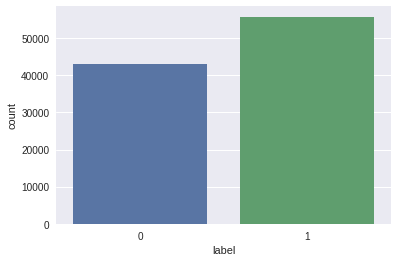

In [112]:
sns.countplot(df['label'])

Separamos twits de las labels

In [113]:
X = df['tweet']
y = pd.get_dummies(df['label']).values
num_classes = df['label'].nunique()
y

array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [0, 1]], dtype=uint8)

In [0]:
seed = 1234
np.random.seed(seed)

Se realiza la separación train/test mediante la librería sklearn

In [197]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.1,
                                                    stratify=y,
                                                    random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(88858,) (9874,) (88858, 2) (9874, 2)


Se tokeniza el texto

In [0]:
from keras.preprocessing.text import Tokenizer
max_features = 1000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

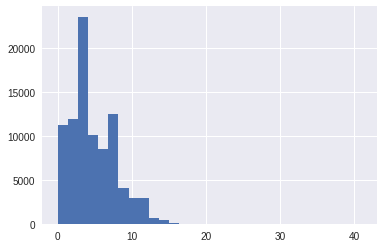

In [199]:
totalNumWords = [len(one_comment) for one_comment in X_train]
plt.hist(totalNumWords,bins = 30)
plt.show()

In [200]:
from keras.preprocessing import sequence
max_words = 30
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
print(X_train.shape,X_test.shape)

(88858, 30) (9874, 30)


In [0]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense,Embedding,Conv1D,MaxPooling1D,LSTM
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

batch_size = 512
epochs = 5

In [0]:
def get_model(max_features, embed_dim):
    np.random.seed(seed)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))    
    model.add(LSTM(100, dropout=4, recurrent_dropout=4))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model

In [0]:
def model_train(model):
    
    model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                          epochs=epochs, batch_size=batch_size, verbose=2)
    
    plot_model_history(model_history)

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def model_evaluate(): 
    # predict class with test set
    y_pred_test =  model.predict_classes(X_test, batch_size=batch_size, verbose=0)
    print('Accuracy:\t{:0.1f}%'.format(accuracy_score(np.argmax(y_test,axis=1),y_pred_test)*100))
    
    #classification report
    print('\n')
    print(classification_report(np.argmax(y_test,axis=1), y_pred_test))

    #confusion matrix
    confmat = confusion_matrix(np.argmax(y_test,axis=1), y_pred_test)

    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 100)           100000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 30, 32)            9632      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 15, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 15, 32)            3104      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 7, 32)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 202       
Total para

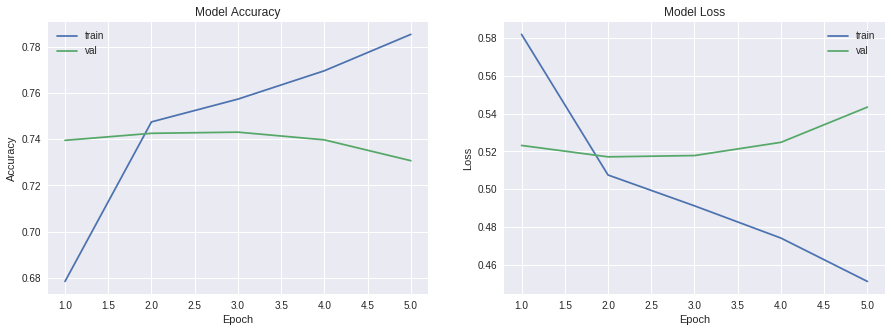

In [206]:
max_features = 1000
embed_dim = 100
model = get_model(max_features, embed_dim)
model_train(model)

Mejoran algo los resultados que el modelo realizado con Bayes, pero tenemos que tener en cuenta que se aprecia un ligero overfitting en los gráficos mostrados.

A continuación utlizaremos el vector preentrenado mediante factorización de matrices por Stanford llamado GloVe para intentar mejorar los resultados

In [0]:
def get_coefs(word, *arr):
    return word, np.asarray(arr, dtype='float32')
    
def get_embed_mat(EMBEDDING_FILE, max_features=1000):
    # word vectors
    embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE, encoding='utf8'))
    print('Found %s word vectors.' % len(embeddings_index))

    # embedding matrix
    word_index = tokenizer.word_index
    num_words = min(max_features, len(word_index) + 1)
    all_embs = np.stack(embeddings_index.values()) #for random init
    embedding_matrix = np.random.normal(all_embs.mean(), all_embs.std(), 
                                        (num_words, embed_dim))
    for word, i in word_index.items():
        if i >= max_features:
            continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    max_features = embedding_matrix.shape[0]
    
    return max_features, embedding_matrix

In [0]:
def get_model(max_features, embed_dim, embedding_matrix):
    np.random.seed(seed)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1],
                       weights=[embedding_matrix]))#,trainable=False
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))    
    model.add(LSTM(100, dropout=0.7, recurrent_dropout=0.7))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model

El archivo utlizado se encuentra en https://nlp.stanford.edu/projects/glove/ y ha sido descargado a Drive para poder trabajar con él ya que debido al gran tamaño del mismo no se podía poner ni en github ni se ha podido realizar de otra forma.

Found 1193514 word vectors.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 25)            25000     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 30, 32)            2432      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 15, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 15, 32)            3104      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 7, 32)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 2)          

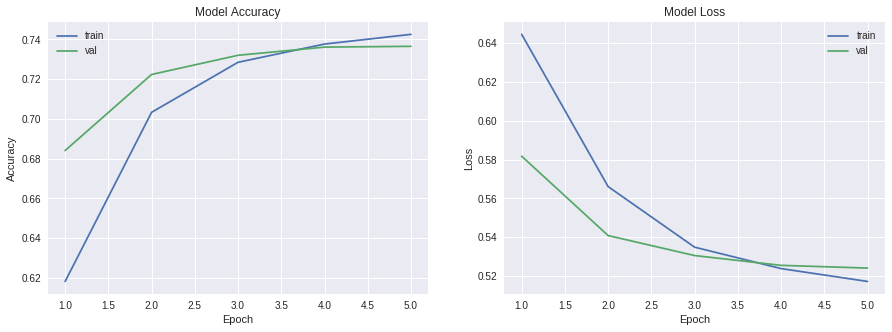

In [186]:
EMBEDDING_FILE = 'glove.twitter.27B.25d.txt'
embed_dim = 25 
max_features, embedding_matrix = get_embed_mat(EMBEDDING_FILE)

# train the model
model = get_model(max_features, embed_dim, embedding_matrix)
model_train(model)

Como se puede observar se obtienen unos resultados parecidos al caso anterior pero una disminución muy grande del overfitting, por lo que consideramos este modelo mucho mejor que el anterior.

#2. TOPIC MODELING

Para solucionar el problema de topic modeling utilizaremos unsupervised learning. El algoritmo que vamos a utilizar LDA. Lo vamos a hacer de texto del que no tenemos etiquetas, ver que temas tenemos en cada texto. Para ello necesitaremos la librería Gensim.

In [207]:
!wget https://raw.githubusercontent.com/jampol71/NLP/master/dataset2.json

--2018-07-22 09:58:30--  https://raw.githubusercontent.com/jampol71/NLP/master/dataset2.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1070528 (1.0M) [text/plain]
Saving to: ‘dataset2.json’

dataset2.json       100%[===================>]   1.02M  --.-KB/s    in 0.03s   

2018-07-22 09:58:31 (29.8 MB/s) - ‘dataset2.json’ saved [1070528/1070528]



In [293]:
df_tm = pd.read_json('dataset2.json') 
df_tm = df_tm.T
df_tm.shape

(5889, 2)

El dataset con el cual deberemos trabajar, es una serie de twits de los presidentes Obama y Trump.

In [294]:
df_tm.head(5)

,label,tweet
0,OBAMA,"“Low plastic stool, cheap but delicious noodles, cold Hanoi beer.” This is how I’ll remember Tony. He taught us about food — but more importantly, about its ability to bring us together. To make us a little less afraid of the unknown. We’ll miss him. https://t.co/orEXIaEMZM"
1,OBAMA,"“Low plastic stool, cheap but delicious noodles, cold Hanoi beer.” This is how I’ll remember Tony. He taught us about food — but more importantly, about its ability to bring us together. To make us a little less afraid of the unknown. We’ll miss him. https://t.co/orEXIaEMZM"
10,OBAMA,Michelle and I are so inspired by all the young people who made today’s marches happen. Keep at it. You’re leading us forward. Nothing can stand in the way of millions of voices calling for change.
100,OBAMA,Senate leaders' obstruction of our Supreme Court nomination process is unacceptable. Say so: https://t.co/t3pYMO8Fp0 #DoYourJob
1000,OBAMA,"In 31 states, people can still be fired because of who they love. Help change that in 2016: https://t.co/19OA1ZV27Y https://t.co/FPJE5lqg3R"


In [295]:
del df_tm['label']

df_tm.head(5)

,tweet
0,"“Low plastic stool, cheap but delicious noodles, cold Hanoi beer.” This is how I’ll remember Tony. He taught us about food — but more importantly, about its ability to bring us together. To make us a little less afraid of the unknown. We’ll miss him. https://t.co/orEXIaEMZM"
1,"“Low plastic stool, cheap but delicious noodles, cold Hanoi beer.” This is how I’ll remember Tony. He taught us about food — but more importantly, about its ability to bring us together. To make us a little less afraid of the unknown. We’ll miss him. https://t.co/orEXIaEMZM"
10,Michelle and I are so inspired by all the young people who made today’s marches happen. Keep at it. You’re leading us forward. Nothing can stand in the way of millions of voices calling for change.
100,Senate leaders' obstruction of our Supreme Court nomination process is unacceptable. Say so: https://t.co/t3pYMO8Fp0 #DoYourJob
1000,"In 31 states, people can still be fired because of who they love. Help change that in 2016: https://t.co/19OA1ZV27Y https://t.co/FPJE5lqg3R"


In [296]:
tweets = df_tm.rename(columns={'tweet': 'Tweet'})
tweets.head(5)

,Tweet
0,"“Low plastic stool, cheap but delicious noodles, cold Hanoi beer.” This is how I’ll remember Tony. He taught us about food — but more importantly, about its ability to bring us together. To make us a little less afraid of the unknown. We’ll miss him. https://t.co/orEXIaEMZM"
1,"“Low plastic stool, cheap but delicious noodles, cold Hanoi beer.” This is how I’ll remember Tony. He taught us about food — but more importantly, about its ability to bring us together. To make us a little less afraid of the unknown. We’ll miss him. https://t.co/orEXIaEMZM"
10,Michelle and I are so inspired by all the young people who made today’s marches happen. Keep at it. You’re leading us forward. Nothing can stand in the way of millions of voices calling for change.
100,Senate leaders' obstruction of our Supreme Court nomination process is unacceptable. Say so: https://t.co/t3pYMO8Fp0 #DoYourJob
1000,"In 31 states, people can still be fired because of who they love. Help change that in 2016: https://t.co/19OA1ZV27Y https://t.co/FPJE5lqg3R"


In [297]:
tweets.head(5)

,Tweet
0,"“Low plastic stool, cheap but delicious noodles, cold Hanoi beer.” This is how I’ll remember Tony. He taught us about food — but more importantly, about its ability to bring us together. To make us a little less afraid of the unknown. We’ll miss him. https://t.co/orEXIaEMZM"
1,"“Low plastic stool, cheap but delicious noodles, cold Hanoi beer.” This is how I’ll remember Tony. He taught us about food — but more importantly, about its ability to bring us together. To make us a little less afraid of the unknown. We’ll miss him. https://t.co/orEXIaEMZM"
10,Michelle and I are so inspired by all the young people who made today’s marches happen. Keep at it. You’re leading us forward. Nothing can stand in the way of millions of voices calling for change.
100,Senate leaders' obstruction of our Supreme Court nomination process is unacceptable. Say so: https://t.co/t3pYMO8Fp0 #DoYourJob
1000,"In 31 states, people can still be fired because of who they love. Help change that in 2016: https://t.co/19OA1ZV27Y https://t.co/FPJE5lqg3R"


Se va realizar un preprocesado de los twits

In [0]:
#eliminamos nombres de usuarios
tweets['Tweet'] = tweets['Tweet'].apply((lambda x: re.sub('@[a-zA-z0-9_]+','',x)))

In [0]:
#sustituimos símbolos
tweets['Tweet'] = tweets['Tweet'].apply((lambda x: re.sub(r'&amp', 'and', x)))

In [0]:
#eliminamos links
tweets['Tweet'] = tweets['Tweet'].apply((lambda x: re.sub('(http|https)://[a-zA-Z0-9\./]+','',x)))

In [0]:
#eliminamos Stop Words
from nltk.corpus import stopwords
stop = stopwords.words('english')
tweets['Tweet'] = tweets['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [302]:
#Spelling correction
from textblob import TextBlob
tweets['Tweet'][:5].apply(lambda x: str(TextBlob(x).correct()))

0       “Now plastic stool, cheap delicious nodules, cold Anti beer.” His I’ll remember Bony. He taught us food — importantly, ability bring us together. To make us little less afraid unknown. He’ll miss him.
1       “Now plastic stool, cheap delicious nodules, cold Anti beer.” His I’ll remember Bony. He taught us food — importantly, ability bring us together. To make us little less afraid unknown. He’ll miss him.
10      Michelle I inspired young people made today’s marches happen. Deep it. You’re leading us forward. Nothing stand way millions voices calling change.                                                     
100     Senate leaders' obstruction Supreme Court nomination process unacceptable. May so: #DoYourJob                                                                                                           
1000    In 31 states, people still fired love. Help change 2016:                                                                                                    

In [0]:
#Lemmatización (en vez de stemming por ser más eficaz)
from textblob import Word
tweets['Tweet'] = tweets['Tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

Se verifican los twits que tenemos

In [304]:
range(len(tweets['Tweet']))

range(0, 5889)

Definimos el corpus que se va a utilizar

In [0]:
corpus=[]
a=[]
for i in range(len(tweets['Tweet'])):
        a=tweets['Tweet'][i]
        corpus.append(a)

In [306]:
corpus[0:5]

['“Low plastic stool, cheap delicious noodles, cold Hanoi beer.” This I’ll remember Tony. He taught u food — importantly, ability bring u together. To make u little le afraid unknown. We’ll miss him.',
 '“Low plastic stool, cheap delicious noodles, cold Hanoi beer.” This I’ll remember Tony. He taught u food — importantly, ability bring u together. To make u little le afraid unknown. We’ll miss him.',
 'This National Gun Violence Awareness Day, show commitment keeping kid safe gun violence. Then, everyone we’ve lost, take action change leadership law reflect commitment - matter long takes.',
 'We never truly repay debt owe fallen heroes. But remember them, honor sacrifice, affirm life enduring ideal justice, equality, opportunity generation Americans given last full measure devotion.',
 'This Center leader tomorrow ready step build world be. Michelle I grateful Chicagoans Chicago City Council making happen.']

Se va a utilizar gensim, que es una librería que se utiliza exclusivamente para Topic Modeling. 

In [0]:
from gensim import corpora, models, similarities
from nltk.corpus import stopwords
from string import punctuation

Se va a realizar un pequeño preprocesamiento de los datos del dataset para obtener mejores resultados en el modelo.

In [0]:
list1 = ['RT','rt']
stoplist = stopwords.words('english') + list(punctuation) + list1

texts = [[word for word in str(document).lower().split() if word not in stoplist] for document in corpus]

In [0]:
dictionary = corpora.Dictionary(texts)

In [0]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [0]:
from gensim import corpora, models, similarities

In [0]:
tfidf = models.TfidfModel(corpus) 

In [0]:
corpus_tfidf = tfidf[corpus]  

Queremos agrupar todo en 5 topics

In [0]:
total_topics = 10

LDA es un modelo generativo.

In [0]:
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf]

A continuación, se han definido topics que son grupos de palabras. Lo que se muestra es cada palabra la cantidad de cada uno de los topics que se han definido.

In [316]:
lda.show_topics(total_topics,5)

[(0,
  '0.024*"strong" + 0.007*"totally" + 0.007*"even" + 0.006*"obama" + 0.006*"china"'),
 (1,
  '0.021*"great" + 0.016*"obama" + 0.012*"—president" + 0.011*"really" + 0.010*"news"'),
 (2,
  '0.023*"great" + 0.017*"and;" + 0.010*"looking" + 0.009*"big" + 0.006*"working"'),
 (3,
  '0.044*"and;" + 0.023*"condolence" + 0.022*"offer" + 0.012*"great" + 0.012*"republican"'),
 (4,
  '0.028*"tax" + 0.023*"president" + 0.022*"obama" + 0.010*"democrats" + 0.009*"new"'),
 (5,
  '0.010*"great" + 0.009*"said" + 0.008*"meeting" + 0.006*"would" + 0.006*"illegal"'),
 (6,
  '0.021*"great" + 0.017*"and;" + 0.010*"honor" + 0.009*"time" + 0.009*"welcome"'),
 (7,
  '0.016*"great" + 0.015*"news" + 0.008*"u.s." + 0.007*"total" + 0.007*"obama"'),
 (8,
  '0.029*"attack" + 0.028*"terrorist" + 0.025*"london." + 0.023*"well." + 0.019*"today"'),
 (9,
  '0.018*"may" + 0.014*"theresa" + 0.012*"thank" + 0.011*"spoke" + 0.010*"prime"')]

In [0]:
from collections import OrderedDict

data_lda = {i: OrderedDict(lda.show_topic(i,25)) for i in range(total_topics)}


In [318]:
df_lda = pd.DataFrame(data_lda)
print(df_lda.shape)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(144, 10)
(10, 144)


In [319]:
df_lda

,again!,america,american,and;,attack,bad,believe,better,big,bill,...,welcome,well.,white,woman,work,working,would,year,you!,—president
0,0.0000,0.003774,0.000000,0.000000,0.000000,0.000000,0.003468,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004879
1,0.0000,0.004533,0.000000,0.009164,0.000000,0.000000,0.000000,0.000000,0.007677,0.000000,...,0.000000,0.000000,0.000000,0.003606,0.000000,0.000000,0.000000,0.000000,0.000000,0.012346
2,0.0000,0.004396,0.004116,0.016846,0.000000,0.000000,0.000000,0.000000,0.008572,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.003493,0.005813,0.000000,0.003677,0.000000,0.000000
3,0.0034,0.006605,0.005514,0.043902,0.000000,0.000000,0.000000,0.000000,0.003506,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003431,0.000000,0.000000
4,0.0000,0.000000,0.004622,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.003338,0.000000,0.000000,0.000000,0.006086,0.000000,0.000000,0.007057
5,0.0000,0.000000,0.000000,0.000000,0.000000,0.004410,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006166,0.000000,0.000000,0.000000
6,0.0000,0.000000,0.000000,0.017041,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.008685,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.0000,0.000000,0.004386,0.000000,0.000000,0.000000,0.000000,0.004071,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003595,0.005017,0.000000,0.004845
8,0.0000,0.000000,0.000000,0.000000,0.029224,0.000000,0.000000,0.000000,0.000000,0.002824,...,0.000000,0.022564,0.000000,0.000000,0.000000,0.000000,0.003159,0.000000,0.000000,0.000000
9,0.0000,0.000000,0.000000,0.000000,0.000000,0.004408,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.003797,0.000000,0.000000,0.000000,0.000000,0.000000,0.004262,0.000000


Vamos a proceder a la visualización de modelo

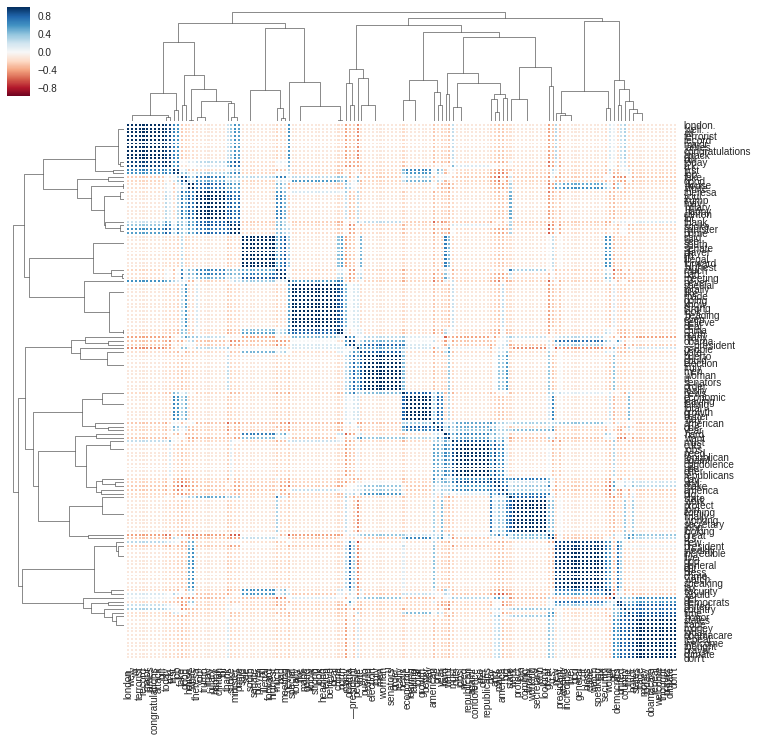

In [320]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

g=sns.clustermap(df_lda.corr(), center=0, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(12, 12))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

In [321]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
1      54.999977  1        1      -125.207344  69.131767 
2      5.000700   1        2      -162.634674 -311.306549
3      5.000117   1        3       140.196472  129.701111
5      4.999971   1        4       371.200348  280.631287
8      4.999875   1        5       203.893448 -366.335693
4      4.999875   1        6       376.001190 -70.674118 
9      4.999871   1        7       59.629681  -130.117889
7      4.999871   1        8      -372.489532 -66.147423 
6      4.999871   1        9      -289.646790  296.067871
0      4.999871   1        10      21.828316   396.111755, topic_info=      Category       Freq        Term      Total  loglift  logprob
term                                                              
181    Default  52.000000  and;        52.000000  30.0000  30.0000
282    Default  95.000000  great       95.000000  29.0000  29.0000
428    Default  38.000000  news        38.000000  28.0000  28.0000
441    Default  67.000000  obama       67.000000  27.0000  27.0000
499    Default  30.000000  president   30.000000  26.0000  26.0000
543    Default  8.000000   attack      8.000000   25.0000  25.0000
10846  Default  9.000000   terrorist   9.000000   24.0000  24.0000
3313   Default  8.000000   tax         8.000000   23.0000  23.0000
593    Default  17.000000  today       17.000000  22.0000  22.0000
469    Default  25.000000  thank       25.000000  21.0000  21.0000
759    Default  7.000000   london.     7.000000   20.0000  20.0000
7376   Default  8.000000   well.       8.000000   19.0000  19.0000
987    Default  8.000000   strong      8.000000   18.0000  18.0000
713    Default  6.000000   condolence  6.000000   17.0000  17.0000
719    Default  6.000000   offer       6.000000   16.0000  16.0000
1402   Default  35.000000  really      35.000000  15.0000  15.0000
1141   Default  47.000000  —president  47.000000  14.0000  14.0000
353    Default  20.000000  america     20.000000  13.0000  13.0000
524    Default  6.000000   may         6.000000   12.0000  12.0000
515    Default  26.000000  election    26.000000  11.0000  11.0000
286    Default  20.000000  many        20.000000  10.0000  10.0000
1382   Default  12.000000  u.s.        12.000000  9.0000   9.0000 
6314   Default  18.000000  fake        18.000000  8.0000   8.0000 
852    Default  32.000000  big         32.000000  7.0000   7.0000 
681    Default  17.000000  american    17.000000  6.0000   6.0000 
209    Default  19.000000  want        19.000000  5.0000   5.0000 
142    Default  13.000000  time        13.000000  4.0000   4.0000 
14     Default  22.000000  make        22.000000  3.0000   3.0000 
1842   Default  12.000000  would       12.000000  2.0000   2.0000 
2141   Default  5.000000   democrats   5.000000   1.0000   1.0000 
...        ...        ...    ...             ...     ...      ... 
10748  Topic10  0.303601   ed          0.443740   2.6162  -6.8772 
8797   Topic10  0.693230   luther      1.216346   2.4335  -6.0515 
2532   Topic10  0.303086   someone     0.447197   2.6068  -6.8789 
549    Topic10  0.568748   tough       1.128924   2.3102  -6.2494 
879    Topic10  0.465526   without     0.851986   2.3914  -6.4497 
10982  Topic10  0.484930   strange     0.921857   2.3534  -6.4089 
107    Topic10  2.104934   even        10.400467  1.3982  -4.9408 
6122   Topic10  1.450896   north       5.714583   1.6249  -5.3129 
1123   Topic10  1.189872   deal        4.252393   1.7221  -5.5113 
6215   Topic10  0.797828   comey       2.190594   1.9857  -5.9110 
136    Topic10  1.021314   look        3.394478   1.7947  -5.6640 
1773   Topic10  1.021012   believe     3.445738   1.7794  -5.6643 
215    Topic10  1.341906   like        6.414345   1.4313  -5.3910 
716    Topic10  1.346526   good        6.931302   1.3572  -5.3876 
10265  Topic10  1.107505   theresa     5.612741   1.3728  -5.5830 
690    Topic10  1.041159   know        4.9433

In [287]:
!pip install tqdm

You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [0]:
from tqdm import tqdm

Los CoherenceModel nos va a permitir valorar lo bueno que es el resultado

In [0]:
from gensim.models import CoherenceModel
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, limit, step)):
        model = models.LdaModel(corpus, id2word=dictionary, num_topics=num_topics, iterations=5, passes=20, alpha='auto')
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

100%|██████████| 19/19 [08:43<00:00, 27.56s/it]


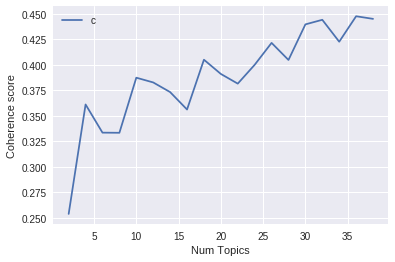

In [292]:
limit=40; start=2; step=2;
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=texts, start=start, limit=limit, step=step)
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

Después de probar varios números de topics, cono 10 se obtiene una coherencia aceptable y no existe ningún tipo de solapamiento entre los mismo como se puede ver en el el gráfico de bolas mostrado anteriormente.

#3. MODELO GENERATIVO

Este problema de Language Modeling se puede solucionar mediante Bayes pero tendríamos el problema de la independencia de features, por lo que se considera que un desarrollo utilizando deep learning y en concreto las RNN es la mejor alternativa.

De entre todas las arquitecturas utilizadas para NLP, se ha decidido utilizar RNN porque nos permite extraer texto a partir del contexto anterior. Para la implementación se utilizará la librería Keras. Se va a realizar la predicción con caracteres.

Cargamos el dataset desde github

In [15]:
!wget https://raw.githubusercontent.com/jampol71/NLP/master/dataset2.json

--2018-07-21 17:18:04--  https://raw.githubusercontent.com/jampol71/NLP/master/dataset2.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1070528 (1.0M) [text/plain]
Saving to: ‘dataset2.json’

dataset2.json       100%[===================>]   1.02M  --.-KB/s    in 0.1s    

2018-07-21 17:18:04 (8.61 MB/s) - ‘dataset2.json’ saved [1070528/1070528]



Pasamos el dataset a DataFrame para poder trabajar con él. En el dataset vemos que se trata de una serie de twits de Obama y Trump. Como sólo necesitaremos generar texto de uno de los dos personajes, se ha escogido Obama, por lo que tendremos que eliminar a Trump y darle la forma adecuada al DF para poder trabajar con él.

In [322]:
df_presidents = pd.read_json('dataset2.json')
df_presidents.head(5)

,0,1,10,100,1000,1001,1002,1003,1004,1005,...,990,991,992,993,994,995,996,997,998,999
label,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,...,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA
tweet,"“Low plastic stool, cheap but delicious noodles, cold Hanoi beer.” This is how I’ll remember Tony. He taught us about food — but more importantly, about its ability to bring us together. To make us a little less afraid of the unknown. We’ll miss him. https://t.co/orEXIaEMZM","“Low plastic stool, cheap but delicious noodles, cold Hanoi beer.” This is how I’ll remember Tony. He taught us about food — but more importantly, about its ability to bring us together. To make us a little less afraid of the unknown. We’ll miss him. https://t.co/orEXIaEMZM",Michelle and I are so inspired by all the young people who made today’s marches happen. Keep at it. You’re leading us forward. Nothing can stand in the way of millions of voices calling for change.,Senate leaders' obstruction of our Supreme Court nomination process is unacceptable. Say so: https://t.co/t3pYMO8Fp0 #DoYourJob,"In 31 states, people can still be fired because of who they love. Help change that in 2016: https://t.co/19OA1ZV27Y https://t.co/FPJE5lqg3R","Seven down, one more to go. Make sure you tune in for President Obama's last #SOTU: https://t.co/HFgZR9WXRC https://t.co/xqSZBhULy2",Have you entered yet? You and a friend could win a trip to Alaska: https://t.co/t6XiS36KEa https://t.co/WOixbqA6Tb,Check out five big victories that made 2015 a great year for progress: https://t.co/QUoecEpNfJ,Suit up—it's President Obama's final State of the Union. Say you'll tune in: https://t.co/AGwK7ExsUV https://t.co/RFwI8GwxIh,You can still join the team fighting for progress. Get your contribution in under the wire: https://t.co/j5kL0bIr35 https://t.co/Mu59GJBSR3,...,You don't want to miss this. Say you'll tune in for President Obama's final #SOTU: https://t.co/0nLa9bR8wb https://t.co/JkidFquqS7,LAST CALL: You could be going on a seven-day cruise to Alaska—but only if you enter today. https://t.co/L1a5XkmNoq https://t.co/OLUPeoJpLH,Thinking of ways you can help out over the next year? Look no further: https://t.co/BhXZzzrqqt https://t.co/dYSv2HwKjW,DEADLINE: Chip in to help fund the fight for more progress in 2016. https://t.co/ezVFTh8LJ2,You and a friend could be heading north. Enter now to win a cruise to Alaska: https://t.co/R3Zhuc2Jt4 https://t.co/P8NjsWwpAg,TONIGHT: Come in with the clutch contribution before the deadline. https://t.co/kmfpf4CbDf https://t.co/fdDYhGu9ng,Global climate action became a reality this year—keep the progress going in 2016: https://t.co/LoFVusJz5p https://t.co/0Xqt4gJM3G,Chip in to help gear up for the big fights in 2016: https://t.co/Xkhkfx6GtO https://t.co/8b4O2wTDyX,Here's your chance to get lost in the beauty of the Last Frontier state: https://t.co/FMSKYxg5T9 https://t.co/luIDL2OmOw,Get ready—the deadline to pitch in before the new year is right around the corner. https://t.co/hbXvpbu6RY https://t.co/c9MakiUyrW


In [323]:
df_presidents = df_presidents.T
df_presidents.shape

(5889, 2)

In [0]:
df_obama = df_presidents[df_presidents['label'] == 'OBAMA']

In [325]:
df_obama.head(5)
df_obama.shape

(2894, 2)

Como se puede observar, nos hemos quedado con 2894 twits de Obama.

In [326]:
df_obama.head(5)

,label,tweet
0,OBAMA,"“Low plastic stool, cheap but delicious noodles, cold Hanoi beer.” This is how I’ll remember Tony. He taught us about food — but more importantly, about its ability to bring us together. To make us a little less afraid of the unknown. We’ll miss him. https://t.co/orEXIaEMZM"
1,OBAMA,"“Low plastic stool, cheap but delicious noodles, cold Hanoi beer.” This is how I’ll remember Tony. He taught us about food — but more importantly, about its ability to bring us together. To make us a little less afraid of the unknown. We’ll miss him. https://t.co/orEXIaEMZM"
10,OBAMA,Michelle and I are so inspired by all the young people who made today’s marches happen. Keep at it. You’re leading us forward. Nothing can stand in the way of millions of voices calling for change.
100,OBAMA,Senate leaders' obstruction of our Supreme Court nomination process is unacceptable. Say so: https://t.co/t3pYMO8Fp0 #DoYourJob
1000,OBAMA,"In 31 states, people can still be fired because of who they love. Help change that in 2016: https://t.co/19OA1ZV27Y https://t.co/FPJE5lqg3R"


In [0]:
tweets = df_obama.tweet

In [328]:
x = 0
for i in range(x,x+5):
    print(tweets[i])
    print()

“Low plastic stool, cheap but delicious noodles, cold Hanoi beer.” This is how I’ll remember Tony. He taught us about food — but more importantly, about its ability to bring us together. To make us a little less afraid of the unknown. We’ll miss him. https://t.co/orEXIaEMZM

“Low plastic stool, cheap but delicious noodles, cold Hanoi beer.” This is how I’ll remember Tony. He taught us about food — but more importantly, about its ability to bring us together. To make us a little less afraid of the unknown. We’ll miss him. https://t.co/orEXIaEMZM

This National Gun Violence Awareness Day, show your commitment to keeping our kids safe from gun violence. Then, for everyone we’ve lost, take action to change our leadership and our laws until they reflect that commitment - no matter how long it takes. https://t.co/lraIwlQAgl

We can never truly repay the debt we owe our fallen heroes. But we can remember them, honor their sacrifice, and affirm in our own lives those enduring ideals of justice

Vamos a procedero a un preprocesado de los tweets antes de trabajar con ellos.

In [0]:
def clean_tweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'[_"\-;%()|.,+&=*%]', '', tweet)
    tweet = re.sub(r'\.', ' . ', tweet)
    tweet = re.sub(r'\!', ' !', tweet)
    tweet = re.sub(r'\?', ' ?', tweet)
    tweet = re.sub(r'\,', ' ,', tweet)
    tweet = re.sub(r':', ' : ', tweet)
    tweet = re.sub(r'#', ' # ', tweet)
    tweet = re.sub(r'@', ' @ ', tweet)
    tweet = re.sub(r'd .c .', 'd.c.', tweet)
    tweet = re.sub(r'u .s .', 'd.c.', tweet)
    tweet = re.sub(r' amp ', ' and ', tweet)
    tweet = re.sub(r'pm', ' pm ', tweet)
    tweet = re.sub(r'news', ' news ', tweet)
    tweet = re.sub(r' . . . ', ' ', tweet)
    tweet = re.sub(r' .  .  . ', ' ', tweet)
    tweet = re.sub(r' ! ! ', ' ! ', tweet)
    tweet = re.sub(r'&amp', 'and', tweet)
    return tweet

A continuación crearemos una lista que contenga dichos twits

In [0]:
obama_dataset = []
for tweet in tweets:
    tweet = clean_tweet(tweet)
    if len(tweet) > 0:
        obama_dataset.append(tweet)

In [331]:
len(obama_dataset)

2894

Realizaremos una tokenización por caracteres

In [0]:
tokenized = [list(x) for x in obama_dataset]


Nos guardamos los caracteres que sirven para inicializar frase

In [0]:
init_chars = [x[:5] for x in tokenized]
for i in range(len(init_chars)):
    tmp = init_chars[i]
    tmp.insert(0, '<SOS>')
    init_chars[i] = tmp[:5]    

In [334]:
start_token = [s[1] for s in tokenized if len(s) > 1]
len(start_token)

2894

In [335]:
maxlen = max([len(x) for x in tokenized])
avglen = sum([len(x) for x in tokenized])/len(tokenized)
print(maxlen, avglen)

277 91.87007601935038


Sacamos el vocabulario. Nos sale un número asequible de tokens.

In [336]:
vocab = [t for s in obama_dataset for t in s]
print('num tokens: {}'.format(len(vocab)))

num tokens: 265872


Añadimos los tokens que necesitamos para generar texto

In [337]:
vocab_counter = Counter(vocab)
vocab = [w for w, v in vocab_counter.items() if v>2]
vocab = ['<PAD>', '<UNK>', '<SOS>', '<EOS>'] + vocab
nb_vocab = len(vocab)

'num features a user {}'.format(nb_vocab)

'num features a user 62'

Mapeamos el vocabulario

In [0]:
w2id = {k:i for i, k in enumerate(vocab)}
id2w = {i:k for k, i in w2id.items()}

Generamos el dataset

In [339]:
maxlen = min(maxlen, 5)

step = 1

data_train = []

for x in tokenized:
    x.insert(0, '<SOS>')
    x.append('<EOS>')
    for i in range(0, len(x)-maxlen, step):
        data_train.append((x[i:i+maxlen], x[i+maxlen]))
        
print('nb_sequences: {}'.format(len(data_train)))


nb_sequences: 257190


Utilizaremos callbacks en Keras.

Esta función servirá para realizar predicciones más precisas o menos.

In [0]:
def sample_pred(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

Esta función nos servirá para indicarle cada cuantas épocas queremos que se muestre un ejemplo. Vamos a empezar con 4. Esta función va a predecir el siguiente caracter de la secuencia.

In [0]:

SAMPLE_EVERY = 4
class Sampletest(Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % SAMPLE_EVERY == 0  and epoch>0:
            data_test = []
            nb_samples = 1
            
            params = {
                'maxlen': maxlen,
                'vocab': nb_vocab,
                'use_embeddings': True
                }
            for _ in range(nb_samples):
                data_test = choice(init_chars)
                for diversity in [0.2, 0.6, 1.2]:
                    print('----- diversity:', diversity)
                    sentence = copy(data_test)
                    generated = copy(data_test)
                    for i in range(len(data_test), 400):
                        x_pred = np.zeros((1, params['maxlen']))
                        for t, char in enumerate(sentence):
                            x_pred[0, t] = w2id[char] if char in w2id else w2id['<UNK>']
                        preds = self.model.predict(x_pred, verbose=0)[0]
                        next_index = sample_pred(preds, diversity)
                        next_char = id2w[next_index]
                        if next_char == '<EOS>':
                            break
                        generated += [next_char]
                        sentence = sentence[1:] 
                        sentence += [next_char]
                    print(''.join(generated))

In [0]:
class TimeHistory(Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

Aquí se está encapsulando el modelo que vamos a ejecutar, lo que hará que el código esté mucho más limpio y organizado. Este modelo tiene una capa bidireccional y 3 LTSM. Según los estudios que existen esto produce resultados adecuados.

In [0]:
class LM:
    def __init__(self, **kwargs):
        self.params = kwargs.pop('params', None)
    
    def compile_bidirectional(self, params={}):
        
        lm_inputs = Input(shape=(params['maxlen'], ), name='lm_input')
        
        embeddings = Embedding(params['vocab'], params['emb_feats'])(lm_inputs)
        
        lstm =  CuDNNLSTM(params['rnn_hidden'], return_sequences=True, name='rnn1')        
        
        lmlstm = Bidirectional(lstm)(embeddings)       
        
        stacklstm =  CuDNNLSTM(params['rnn_hidden'], return_sequences=False, name='stacked')
        
        stackedlstm = stacklstm(lmlstm)
        
        lmout = Dense(params['vocab'], activation='softmax')(stackedlstm)
        
        model = Model(lm_inputs, lmout)
        
        model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
        
        model.summary()
        
        return model
        
    def train(self, model, data, params={}):
        
        callbacks = self._get_callbacks()
        
        if 'shuffle' in params and params['shuffle']:
            shuffle(data)
            
        sentences, next_chars = zip(*data)
        print(sentences[0])
        x = np.zeros((len(data), params['maxlen']))
        y = np.zeros((len(data), params['vocab']))
        for i, sentence in enumerate(sentences):
            for t, char in enumerate(sentence):
                x[i, t] = w2id[char] if char in w2id else w2id['<UNK>']
            y[i, w2id[next_chars[i]] if next_chars[i] in w2id else w2id['<UNK>']]  = 1
        
        model.fit(x, y, batch_size=params['batch_size'], epochs=params['epochs'], callbacks=callbacks, verbose=1)

    def predict(self, model, data, params={}):        
        if 'use_embeddings' in params and params['use_embeddings']:
            # variedad en las predicciones
            for diversity in [0.2, 0.6, 1.2]:
                print('----- diversity:', diversity)
                sentence = copy(data)
                generated = copy(data)
                # cuantas predicciones queremos hacer
                for i in range(len(data), 400):
                    x_pred = np.zeros((1, params['maxlen']))
                    # preparar inpunt
                    for t, char in enumerate(sentence):
                        x_pred[0, t] = w2id[char] if char in w2id else w2id['<UNK>']
                    # predecir
                    preds = self.model.predict(x_pred, verbose=0)[0]
                    next_index = sample_pred(preds, diversity)
                    next_char = id2w[next_index]
                    # mirar si hemos terminado
                    if next_char == '<EOS>':
                        break
                                           
                    generated += [next_char]
                    sentence = sentence[1:] 
                    sentence += [next_char]
                print(''.join(generated))
    
    
    def load(self, model_path='seq2seq_attn.h5'):
        return load_model(model_path)
    
    def _get_callbacks(self, model_path='seq2seq_attn.h5'):
        
        
        es = EarlyStopping(monitor='loss', patience=4, mode='auto', verbose=0)       
        
        save_best = ModelCheckpoint(model_path, monitor='loss', verbose = 0, save_best_only=True, save_weights_only=False, period=2)
        st = Sampletest()
        # hd = HistoryDisplay()
        rlr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose=1)
        return [st, rlr]

Definimos los hyperparámetros

In [0]:
compile_params = {
    'maxlen': maxlen, 
    'vocab': len(vocab),
    'emb_feats': 100,
    'rnn_hidden': 256,
}

In [0]:
LOAD_MODEL = False
bTrain = True

Procedemos a compilar. Gracias al callback early stopping se parará cuando pare de disminuir la val_loss.

In [346]:
lm = LM()
if LOAD_MODEL:
    path = 'final_{}.h5'.format(dtype)
    lm_model = lm.load(model_path=path)
    lm_model.summary()
else:
    lm_model = lm.compile_bidirectional(params=compile_params)   

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lm_input (InputLayer)        (None, 5)                 0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 5, 100)            6200      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 5, 512)            733184    
_________________________________________________________________
stacked (CuDNNLSTM)          (None, 256)               788480    
_________________________________________________________________
dense_2 (Dense)              (None, 62)                15934     
Total params: 1,543,798
Trainable params: 1,543,798
Non-trainable params: 0
_________________________________________________________________


Entrenamos el modelo

In [351]:
train_params = {
    'epochs': 250,
    'batch_size': 256,
    'shuffle': True,
    'vocab': nb_vocab,
    'maxlen': maxlen,
    'use_embeddings': True
}
pp.pprint(train_params)
if bTrain:
    lm.train(model=lm_model, data=data_train, params=train_params)

{'batch_size': 256,
 'epochs': 250,
 'maxlen': 5,
 'shuffle': True,
 'use_embeddings': True,
 'vocab': 62}
['l', 'i', 'm', 'a', 't']
Epoch 1/250
257190/257190 [==============================] - 20s 79us/step - loss: 0.7233 - acc: 0.7506
Epoch 2/250
 49408/257190 [====>.........................] - ETA: 16s - loss: 0.7088 - acc: 0.7573

257190/257190 [==============================] - 20s 79us/step - loss: 0.7251 - acc: 0.7515
Epoch 3/250
257190/257190 [==============================] - 20s 79us/step - loss: 0.7252 - acc: 0.7517
Epoch 4/250
 33280/257190 [==>...........................] - ETA: 17s - loss: 0.7023 - acc: 0.7581

257190/257190 [==============================] - 20s 79us/step - loss: 0.7254 - acc: 0.7512

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Epoch 5/250
210432/257190 [=======================>......] - ETA: 3s - loss: 0.6788 - acc: 0.7651

257190/257190 [==============================] - 20s 79us/step - loss: 0.6786 - acc: 0.7651
----- diversity: 0.2
<SOS>thanks to  # actonclimate change is a good for a fair hearing and a fair hearing about the president obama  # sotu
----- diversity: 0.6
<SOS>thanks to help more :  
----- diversity: 1.2
<SOS>thankution syste deal to us grow the  # college shown in here's job gt now for commonsence awa4 
Epoch 6/250
143104/257190 [===============>..............] - ETA: 9s - loss: 0.6629 - acc: 0.7693

257190/257190 [==============================] - 20s 79us/step - loss: 0.6691 - acc: 0.7661
Epoch 7/250
257190/257190 [==============================] - 20s 80us/step - loss: 0.6666 - acc: 0.7662
Epoch 8/250
 58624/257190 [=====>........................] - ETA: 15s - loss: 0.6519 - acc: 0.7735

257190/257190 [==============================] - 20s 79us/step - loss: 0.6655 - acc: 0.7663
Epoch 9/250
257190/257190 [==============================] - 20s 79us/step - loss: 0.6647 - acc: 0.7662
----- diversity: 0.2
<SOS>shipping the president obama  # sotu
----- diversity: 0.6
<SOS>shipping the enter now :  
----- diversity: 1.2
<SOS>ship and better —president obama
Epoch 10/250
 20224/257190 [=>............................] - ETA: 18s - loss: 0.6478 - acc: 0.7704

257190/257190 [==============================] - 20s 79us/step - loss: 0.6642 - acc: 0.7662
Epoch 11/250
257190/257190 [==============================] - 20s 79us/step - loss: 0.6640 - acc: 0.7662
Epoch 12/250
 24064/257190 [=>............................] - ETA: 18s - loss: 0.6622 - acc: 0.7681

257190/257190 [==============================] - 20s 79us/step - loss: 0.6635 - acc: 0.7662
Epoch 13/250
257190/257190 [==============================] - 20s 79us/step - loss: 0.6633 - acc: 0.7659
----- diversity: 0.2
<SOS>senate leaders shouldn't be a part of the president obama  # sotu
----- diversity: 0.6
<SOS>senate leaders to the next generation in the president obama is speak about being and if we retready are why president obama  # sotu
----- diversity: 1.2
<SOS>senate leaders  # iran's pay checks from discussee congress—share people careers are coerty rate 
Epoch 14/250
  9472/257190 [>.............................] - ETA: 19s - loss: 0.6281 - acc: 0.7748

257190/257190 [==============================] - 20s 79us/step - loss: 0.6630 - acc: 0.7660
Epoch 15/250
257190/257190 [==============================] - 20s 80us/step - loss: 0.6629 - acc: 0.7661
Epoch 16/250
 18688/257190 [=>............................] - ETA: 19s - loss: 0.6438 - acc: 0.7759

257190/257190 [==============================] - 20s 80us/step - loss: 0.6627 - acc: 0.7663
Epoch 17/250
257190/257190 [==============================] - 20s 79us/step - loss: 0.6624 - acc: 0.7656
----- diversity: 0.2
<SOS>on the president obama  # actonclimate change :  
----- diversity: 0.6
<SOS>on the fight to fight take a status quo —president obama  # sotu
----- diversity: 1.2
<SOS>on the nations for about hardworking works hardworking up forward to our his read more impacting to helps up the fighting over a  # connected more :  the 1jus nomination to hearingorange :  economy—thath moral assault :  
Epoch 18/250
  7936/257190 [..............................] - ETA: 19s - loss: 0.6531 - acc: 0.7741

257190/257190 [==============================] - 20s 79us/step - loss: 0.6623 - acc: 0.7662
Epoch 19/250
257190/257190 [==============================] - 20s 79us/step - loss: 0.6622 - acc: 0.7654
Epoch 20/250
 19456/257190 [=>............................] - ETA: 18s - loss: 0.6583 - acc: 0.7666

257190/257190 [==============================] - 20s 79us/step - loss: 0.6622 - acc: 0.7656
Epoch 21/250
257190/257190 [==============================] - 20s 79us/step - loss: 0.6621 - acc: 0.7657
----- diversity: 0.2
<SOS>the president obama  # immigration the senate leaders to  # actonclimate change :  
----- diversity: 0.6
<SOS>the economy and i are make sure you agree :  
----- diversity: 1.2
<SOS>the excuses for us sexual as helped more :  
Epoch 22/250
 11008/257190 [>.............................] - ETA: 19s - loss: 0.6361 - acc: 0.7750

257190/257190 [==============================] - 20s 79us/step - loss: 0.6619 - acc: 0.7657
Epoch 23/250
257190/257190 [==============================] - 20s 79us/step - loss: 0.6618 - acc: 0.7658
Epoch 24/250
 19456/257190 [=>............................] - ETA: 18s - loss: 0.6534 - acc: 0.7681

257190/257190 [==============================] - 20s 79us/step - loss: 0.6618 - acc: 0.7654
Epoch 25/250
257190/257190 [==============================] - 20s 79us/step - loss: 0.6617 - acc: 0.7657
----- diversity: 0.2
<SOS>meaningful sign up for the work to do the  # sotu
----- diversity: 0.6
<SOS>meaningforces
----- diversity: 1.2
<SOS>meaningforce basic :  
Epoch 26/250
 14080/257190 [>.............................] - ETA: 19s - loss: 0.6386 - acc: 0.7752

257190/257190 [==============================] - 20s 79us/step - loss: 0.6616 - acc: 0.7654
Epoch 27/250
257190/257190 [==============================] - 20s 79us/step - loss: 0.6615 - acc: 0.7657
Epoch 28/250
 21760/257190 [=>............................] - ETA: 18s - loss: 0.6630 - acc: 0.7675

257190/257190 [==============================] - 20s 79us/step - loss: 0.6615 - acc: 0.7654
Epoch 29/250
257190/257190 [==============================] - 20s 79us/step - loss: 0.6615 - acc: 0.7655
----- diversity: 0.2
<SOS>new reporters :  
----- diversity: 0.6
<SOS>new reporters :  
----- diversity: 1.2
<SOS>new jobs 
Epoch 30/250
 15616/257190 [>.............................] - ETA: 19s - loss: 0.6337 - acc: 0.7765

257190/257190 [==============================] - 20s 79us/step - loss: 0.6614 - acc: 0.7658
Epoch 31/250
257190/257190 [==============================] - 20s 79us/step - loss: 0.6613 - acc: 0.7656
Epoch 32/250
 22528/257190 [=>............................] - ETA: 18s - loss: 0.6509 - acc: 0.7715

257190/257190 [==============================] - 20s 79us/step - loss: 0.6614 - acc: 0.7654
Epoch 33/250
257190/257190 [==============================] - 20s 79us/step - loss: 0.6611 - acc: 0.7660
----- diversity: 0.2
<SOS>get the fight for a fair health care is a big deadline :  
----- diversity: 0.6
<SOS>get a fair hear the troops  # fixoverty rate the president obama  # sotu
----- diversity: 1.2
<SOS>get your name if you checks for qualificancer supported 
Epoch 34/250
 11008/257190 [>.............................] - ETA: 19s - loss: 0.6441 - acc: 0.7727

257190/257190 [==============================] - 20s 79us/step - loss: 0.6612 - acc: 0.7656
Epoch 35/250
257190/257190 [==============================] - 20s 79us/step - loss: 0.6611 - acc: 0.7658
Epoch 36/250
 20224/257190 [=>............................] - ETA: 18s - loss: 0.6316 - acc: 0.7798

257190/257190 [==============================] - 20s 79us/step - loss: 0.6612 - acc: 0.7655

Epoch 00036: ReduceLROnPlateau reducing learning rate to 0.0001.
Epoch 37/250
218880/257190 [========================>.....] - ETA: 3s - loss: 0.6515 - acc: 0.7687

257190/257190 [==============================] - 20s 79us/step - loss: 0.6524 - acc: 0.7680
----- diversity: 0.2
<SOS>by all of us to get a fair hearing about the president obama  # sotu
----- diversity: 0.6
<SOS>by all the president obama  # actonclimate 
----- diversity: 1.2
<SOS>by almost betweet to vote is :  presence added to lead all of immigration  # enough lowpaying about this could be eligion —president obama  # nation is speaking we lost on climate
Epoch 38/250
129280/257190 [==============>...............] - ETA: 10s - loss: 0.6436 - acc: 0.7721

257190/257190 [==============================] - 20s 79us/step - loss: 0.6518 - acc: 0.7681
Epoch 39/250
257190/257190 [==============================] - 20s 79us/step - loss: 0.6515 - acc: 0.7683
Epoch 40/250
 54784/257190 [=====>........................] - ETA: 16s - loss: 0.6429 - acc: 0.7731

257190/257190 [==============================] - 20s 79us/step - loss: 0.6516 - acc: 0.7678
Epoch 41/250
257190/257190 [==============================] - 20s 79us/step - loss: 0.6515 - acc: 0.7681
----- diversity: 0.2
<SOS>there's to  # actonclimate change :  
----- diversity: 0.6
<SOS>there's to  # actonclimate change :  
----- diversity: 1.2
<SOS>there's nomination waters in california continue that she best power plan to helps fight year 
Epoch 42/250
 16384/257190 [>.............................] - ETA: 18s - loss: 0.6494 - acc: 0.7719

257190/257190 [==============================] - 20s 79us/step - loss: 0.6515 - acc: 0.7681
Epoch 43/250
257190/257190 [==============================] - 20s 79us/step - loss: 0.6515 - acc: 0.7680
Epoch 44/250
 21760/257190 [=>............................] - ETA: 18s - loss: 0.6503 - acc: 0.7712

257190/257190 [==============================] - 20s 79us/step - loss: 0.6514 - acc: 0.7680
Epoch 45/250
257190/257190 [==============================] - 20s 79us/step - loss: 0.6514 - acc: 0.7679
----- diversity: 0.2
<SOS>it's time to stay in the president obama  # sotu
----- diversity: 0.6
<SOS>it's late president obama
----- diversity: 1.2
<SOS>it's nominee paid for movementary men and turn a decades as nothing president obama 
Epoch 46/250
 11776/257190 [>.............................] - ETA: 19s - loss: 0.6358 - acc: 0.7767

257190/257190 [==============================] - 20s 79us/step - loss: 0.6514 - acc: 0.7676
Epoch 47/250
257190/257190 [==============================] - 20s 79us/step - loss: 0.6515 - acc: 0.7679
Epoch 48/250
 20992/257190 [=>............................] - ETA: 18s - loss: 0.6389 - acc: 0.7752

257190/257190 [==============================] - 20s 79us/step - loss: 0.6514 - acc: 0.7678
Epoch 49/250
257190/257190 [==============================] - 20s 79us/step - loss: 0.6514 - acc: 0.7681
----- diversity: 0.2
<SOS>long as longest street read more that make sure you agree :  
----- diversity: 0.6
<SOS>long at the right to working to do 
----- diversity: 1.2
<SOS>long entire prepared  # doyourjob and technology dropped in —president obama 
Epoch 50/250
 11776/257190 [>.............................] - ETA: 19s - loss: 0.6539 - acc: 0.7685

257190/257190 [==============================] - 20s 79us/step - loss: 0.6514 - acc: 0.7678
Epoch 51/250
257190/257190 [==============================] - 20s 79us/step - loss: 0.6513 - acc: 0.7676
Epoch 52/250
 20992/257190 [=>............................] - ETA: 18s - loss: 0.6445 - acc: 0.7726

257190/257190 [==============================] - 20s 79us/step - loss: 0.6513 - acc: 0.7679
Epoch 53/250
257190/257190 [==============================] - 20s 79us/step - loss: 0.6512 - acc: 0.7679
----- diversity: 0.2
<SOS>fact :  
----- diversity: 0.6
<SOS>fact :  
----- diversity: 1.2
<SOS>facts—sign the happy fourth of july every americans aan’s prime rules before takes us that srign on immigration my people what ? 
Epoch 54/250
 12544/257190 [>.............................] - ETA: 19s - loss: 0.6432 - acc: 0.7719

257190/257190 [==============================] - 20s 79us/step - loss: 0.6513 - acc: 0.7682
Epoch 55/250
257190/257190 [==============================] - 20s 79us/step - loss: 0.6513 - acc: 0.7679
Epoch 56/250
 20224/257190 [=>............................] - ETA: 18s - loss: 0.6371 - acc: 0.7768

257190/257190 [==============================] - 20s 79us/step - loss: 0.6513 - acc: 0.7678
Epoch 57/250
257190/257190 [==============================] - 20s 79us/step - loss: 0.6513 - acc: 0.7680
----- diversity: 0.2
<SOS>read more that we can still more the president obama  # sotu
----- diversity: 0.6
<SOS>read more world cut carbon pollution of health care is a continue the  # sotu 
----- diversity: 1.2
<SOS>read disease america —president obama 
Epoch 58/250
 11776/257190 [>.............................] - ETA: 19s - loss: 0.6426 - acc: 0.7742

257190/257190 [==============================] - 20s 79us/step - loss: 0.6513 - acc: 0.7679
Epoch 59/250
257190/257190 [==============================] - 20s 79us/step - loss: 0.6513 - acc: 0.7678
Epoch 60/250
 20992/257190 [=>............................] - ETA: 18s - loss: 0.6406 - acc: 0.7778

257190/257190 [==============================] - 20s 80us/step - loss: 0.6513 - acc: 0.7677
Epoch 61/250
257190/257190 [==============================] - 20s 79us/step - loss: 0.6513 - acc: 0.7678
----- diversity: 0.2
<SOS>read more than reporters are working about the supreme court nominee to stay in the weekly address to  # actonclimate change :  
----- diversity: 0.6
<SOS>read how technology is going the way that start 2015 :  
----- diversity: 1.2
<SOS>ready to your succeed
Epoch 62/250
 11008/257190 [>.............................] - ETA: 19s - loss: 0.6300 - acc: 0.7737

257190/257190 [==============================] - 20s 79us/step - loss: 0.6512 - acc: 0.7675
Epoch 63/250
257190/257190 [==============================] - 20s 79us/step - loss: 0.6512 - acc: 0.7678
Epoch 64/250
 20992/257190 [=>............................] - ETA: 18s - loss: 0.6366 - acc: 0.7766

257190/257190 [==============================] - 20s 79us/step - loss: 0.6513 - acc: 0.7676
Epoch 65/250
257190/257190 [==============================] - 20s 79us/step - loss: 0.6513 - acc: 0.7675
----- diversity: 0.2
<SOS>it's time to stay in the weekly address to  # actonclimate change is a big deal 
----- diversity: 0.6
<SOS>it's time to give americans are making economy will help protect it —president obama  # sotu
----- diversity: 1.2
<SOS>it's businesses efforts 's no better for america's critical for us to keep their job and madeleinable can ma—'ere walking travel what work toigh among level america
Epoch 66/250
  8704/257190 [>.............................] - ETA: 19s - loss: 0.6399 - acc: 0.7727

257190/257190 [==============================] - 20s 79us/step - loss: 0.6512 - acc: 0.7676
Epoch 67/250
257190/257190 [==============================] - 20s 79us/step - loss: 0.6513 - acc: 0.7677
Epoch 68/250
 20224/257190 [=>............................] - ETA: 18s - loss: 0.6593 - acc: 0.7683

257190/257190 [==============================] - 20s 79us/step - loss: 0.6512 - acc: 0.7678
Epoch 69/250
257190/257190 [==============================] - 20s 79us/step - loss: 0.6512 - acc: 0.7676
----- diversity: 0.2
<SOS>carry what it your name if you agree :  
----- diversity: 0.6
<SOS>carry hit the next generation issues your name to get the most of the world 
----- diversity: 1.2
<SOS>carry about —president obama
Epoch 70/250
 12544/257190 [>.............................] - ETA: 19s - loss: 0.6513 - acc: 0.7702

116224/257190 [============>.................] - ETA: 11s - loss: 0.6483 - acc: 0.7705Buffered data was truncated after reaching the output size limit.

Tras realizar una evaluación se observa que la generación de twits es adecuada, pero mejorable con un mayor número de épocas o twits de entrada. Pero debido a los problemas de conexión con Google Collab, a pesar de que se ve que se están generando twits muchas veces se corta antes de llegar al final del entrenamiento. Lo único que faltaría sería calcular la perplexity que es el número de opciones que tiene el modelo, pero por las cuestiones técnicas comentadas no se ha podido realizar (aunque sólo es aplicar una fórmula e intentar que el valor sea lo más bajo posible ya que eso indicará que el algoritmo predice con mayor exactitud).

#GENERAL

In [0]:
!cat /proc/meminfo

In [143]:
!ls

datalab			   train_sentiment_utf8 (1).csv
glove.twitter.27B.25d.txt  train_sentiment_utf8.csv
modelv3c.h5		   train_sentiment_utf8.csv.1
nltk_data		   train_sentiment_utf8.csv.zip


#Download Drive

In [182]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [184]:
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: PracticaTemplate_RL_v7.ipynb, id: 10_0froV2P0lEpe02smxuti7XeHCfs4oJ
title: glove.twitter.27B.25d.txt, id: 1ALzVXpBXyFayEAw7H3XqSK-2S87Mviky
title: NLP, id: 10FEV3gmXKlR79OrxjV9PE3JE3nIvKoON
title: modelv3e.h5, id: 1anzEUt-vHzxzhyRYJJOyLs2tI_ASDKOK
title: modelv3d.h5, id: 1CvsqKt9SmiFmXA63O7DnohFX6J-aXjFy
title: modelv3c.h5, id: 1QWw2GXH0EbvttF9aPkV3qVhS5_13RA3o
title: modelv3b2.h5, id: 1PWMMtZEu44JnUApsdB3489JEdL-GwDO7
title: modelv3b.h5, id: 1pf-KLdz943TC6EpYWJ8nSeKLnkrT6_PT
title: modelv3a.h5, id: 1aeBQbouNZHqDlmbnY2lIpbF7c7aUeAHN
title: model1.h5, id: 1rvuBgAZLTgEO1sZWI4KgYlHyJESDz0i-
title: features2.pkl, id: 1SluXk3vsDHziRQFwiUfBaZ4mMItn_jCs
title: features.pkl, id: 1_-ynzR6pNKiQQG_3RZdOwolVrZ3lNNXp
title: modelv3e.h5, id: 1p6ugPAvubUIsOUNtvfEk9Oe9smEiGLJX
title: modelv3d.h5, id: 1NtdRsw4u7kaVr8xztiBTRCrqY90TehyF
title: modelv3c.h5, id: 1OHFM2H3EmGByyvB7SP89_ibA-9zEA4Lw
title: modelv3b.h5, id: 19KOxfKQemOcYhimyEXcC4N_J_bXQYwwr
title: modelv3.h5, id: 1vLKGAOvRgDoyHkM4aawrLzG

In [0]:
train_downloaded = drive.CreateFile({'id': '1ALzVXpBXyFayEAw7H3XqSK-2S87Mviky'})
train_downloaded.GetContentFile('glove.twitter.27B.25d.txt')

In [2]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

  Running setup.py bdist_wheel for gputil ... - done
  Stored in directory: /content/.cache/pip/wheels/17/0f/04/b79c006972335e35472c0b835ed52bfc0815258d409f560108
Successfully built gputil
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
  Running setup.py bdist_wheel for humanize ... - \ done
  Stored in directory: /content/.cache/pip/wheels/69/86/6c/f8b8593bc273ec4b0c653d3827f7482bb2001a2781a73b7f44
Successfully built humanize
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Gen RAM Free: 11.9 GB  | Proc size: 1.0 GB
GPU RAM Free: 564MB | Used: 10875MB | Util  95% | Total 11439MB


In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'